In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline
import seaborn as sns

In [2]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type/1500ev'
os.chdir(path)
#list success cascades info according the obtained data last frame
success_s=[]
for i in range(180):
    if os.path.isfile('./data.lastframe{}'.format(i)):
        success_s.append(i)
success_s=np.array(success_s)

In [19]:
#calculate MSD(Ga & O ) of each frame
def calculate_msd(df,d):
    #discarding atoms who's  displacements is lower than d
    df=df[df['Displacement Magnitude']>d]
    MSD_f=np.zeros(2)
    #extract Ga info
    Gadf=df[df['Particle Type'].isin([1,2])]
    #calculate Ga MSD
    GaMSD=(Gadf['Displacement Magnitude']**2).sum()/len(Gadf)
    MSD_f[0]= GaMSD
    #extract O info
    Odf=df[df['Particle Type'].isin([3,4,5])]
    #calculate O MSD
    OMSD=(Odf['Displacement Magnitude']**2).sum()/len(Odf)
    MSD_f[1]= OMSD   
    return MSD_f
        

In [15]:
#seperate frames into 2 group according to the PKA atom type atom is Ga or O 
pkatype=np.zeros(len(success_s))
for i in range(len(success_s)):
    file="PKA_inf{}.txt".format(success_s[i])
    f=open(file)
    pkatype[i]=int(f.readlines()[0].split()[2])

#frame array which PKA atom is Ga
PKA_Ga_frame=success_s[np.where(pkatype<=2)[0]]
#frame array which PKA atom is O
PKA_O_frame=success_s[np.where(pkatype>2)[0]]

In [11]:
PKA_O_frame

array([  0,   1,   2,   9,  11,  12,  13,  15,  17,  18,  19,  20,  21,
        22,  26,  27,  31,  33,  34,  35,  36,  44,  46,  47,  52,  53,
        56,  61,  64,  66,  68,  69,  71,  75,  81,  82,  83,  84,  86,
        87,  94,  96, 103, 105, 109, 110, 112, 113, 116, 117, 118, 121,
       127, 129, 130, 138, 139, 140, 144, 146, 147, 148])

In [20]:
# the displacement produced by single cascade is sensitive to PKA atom type. 
#Ga is easier let more atoms to generate bigger displacement
#hence here MSD analysis is done seperately according to PKA atom type.
#PKA is Ga, analysis the MSD as function of d which is used to filter atoms with lower displacements.
D=np.linspace(0,1.0,20)
GaMSD_mean_d=np.zeros((20,2))
GaMSD_stde_d=np.zeros((20,2))
for j in range(20):
    d=D[j]
    GaMSD_total=np.zeros((len(PKA_Ga_frame),2))
    for i in range(len(PKA_Ga_frame)):
        df=pd.read_csv('MSD/particle_Displacement_Magnitude{}.csv'.format(PKA_Ga_frame[i]))
        GaMSD_total[i,:]=calculate_msd(df,d)
    
    GaMSD_mean_d[j,:]=np.mean(GaMSD_total,axis=0)
    GaMSD_stde_d[j,:]=np.std(GaMSD_total,axis=0)/np.sqrt(len(PKA_Ga_frame))


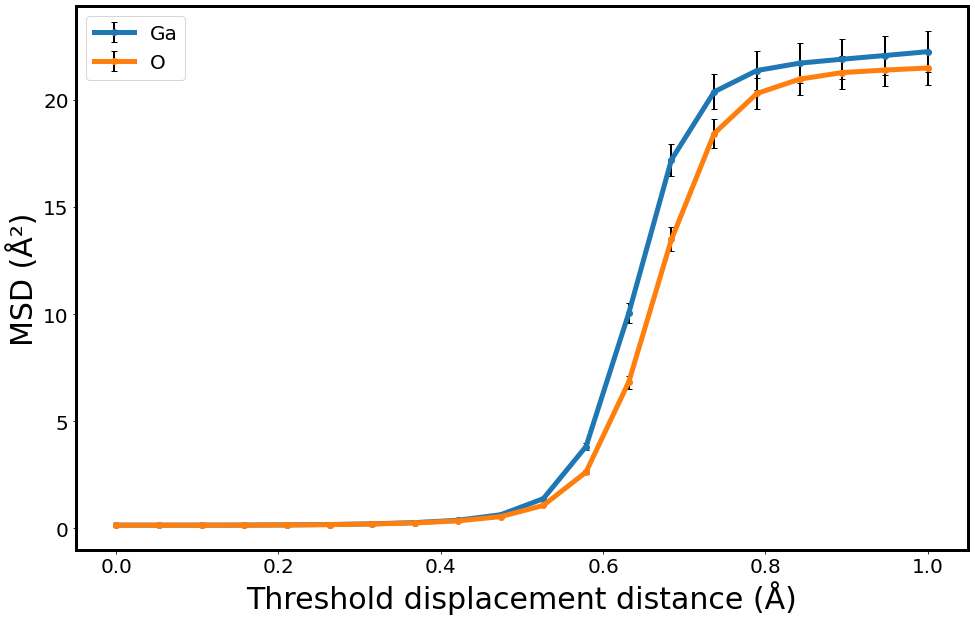

In [21]:
#PKA is Ga,Plot MSD as function of d 
plt.errorbar(D,GaMSD_mean_d[:,0],yerr=GaMSD_stde_d[:,0], label='Ga',linewidth=5,fmt='-o', ecolor='black', capsize=3,elinewidth=2)
plt.errorbar(D,GaMSD_mean_d[:,1],yerr=GaMSD_stde_d[:,1], label='O',linewidth=5,fmt='-o', ecolor='black', capsize=3,elinewidth=2)
plt.ylabel('MSD (\u212B\u00B2)',fontsize=30)
plt.xlabel('Threshold displacement distance (\u212B)',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (16,10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [12]:
# the displacement produced by single cascade is sensitive to PKA atom type. 
#Ga is easier let more atoms to generate bigger displacement
#hence here MSD analysis is done seperately according to PKA atom type.
#PKA is O, analysis the MSD as function of d which is used to filter atoms with lower displacements.
#D=np.linspace(0,0.4,20)
OMSD_mean_d=np.zeros((20,2))
OMSD_stde_d=np.zeros((20,2))
for j in range(20):
    d=D[j]
    OMSD_total=np.zeros((len(PKA_O_frame),2))
    for i in range(len(PKA_O_frame)):
        df=pd.read_csv('particle_Displacement_Magnitude{}.csv'.format(PKA_O_frame[i]))
        OMSD_total[i,:]=calculate_msd(df,d)
    OMSD_mean_d[j,:]=np.mean(OMSD_total,axis=0)
    OMSD_stde_d[j,:]=np.std(OMSD_total,axis=0)/np.sqrt(len(PKA_O_frame))


FileNotFoundError: [Errno 2] No such file or directory: 'particle_Displacement_Magnitude1.csv'

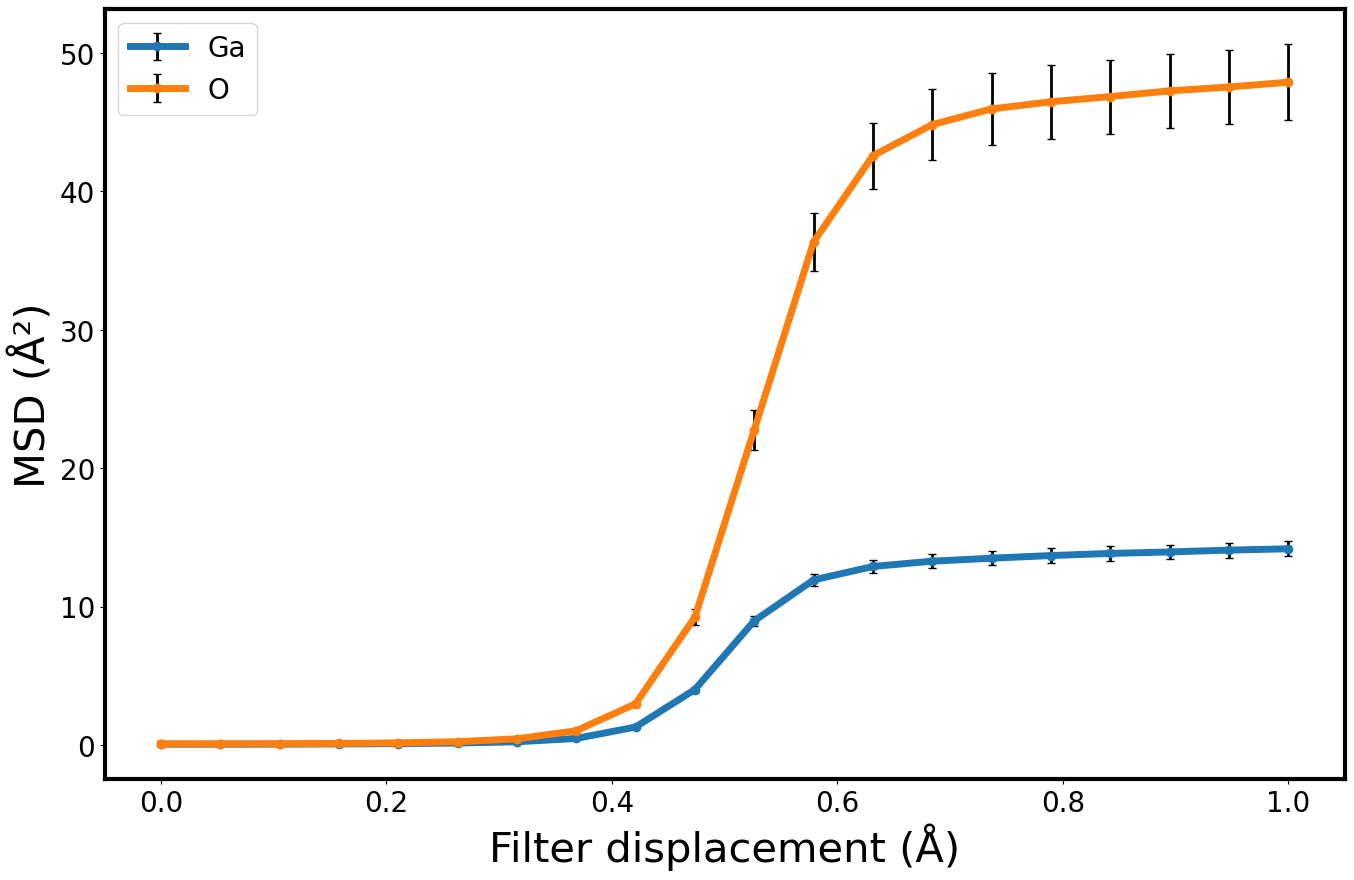

In [29]:
#PKA is O,Plot MSD as function of d 

plt.errorbar(D,OMSD_mean_d[:,0],yerr=OMSD_stde_d[:,0], label='Ga',linewidth=5,fmt='-o', ecolor='black', capsize=3,elinewidth=2)
plt.errorbar(D,OMSD_mean_d[:,1],yerr=OMSD_stde_d[:,1], label='O',linewidth=5,fmt='-o', ecolor='black', capsize=3,elinewidth=2)
plt.ylabel('MSD (\u212B\u00B2)',fontsize=30)
plt.xlabel('Threshold displacement distance (\u212B)',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (16,10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [13]:
#regardless of PKA atom type, calculate totoal mean MSD as function of d
#D=np.linspace(0,0.4,20)
MSD_mean_d=np.zeros((20,2))
MSD_stde_d=np.zeros((20,2))
for j in range(20):
    d=D[j]
    MSD_total=np.zeros((len(success_s),2))
    for i in range(len(success_s)):
        df=pd.read_csv('particle_Displacement_Magnitude{}.csv'.format(success_s[i]))
        MSD_total[i,:]=calculate_msd(df,d)
    MSD_mean_d[j,:]=np.mean(MSD_total,axis=0)
    MSD_stde_d[j,:]=np.std(MSD_total,axis=0)/np.sqrt(len(success_s))


FileNotFoundError: [Errno 2] No such file or directory: 'particle_Displacement_Magnitude0.csv'

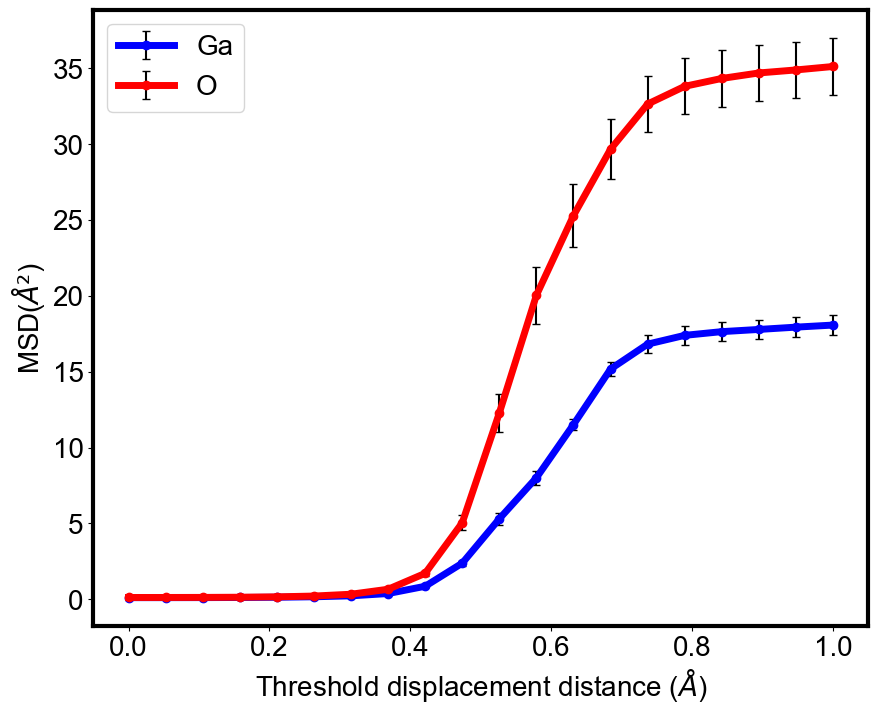

In [23]:
#Regardless of PKA atom type, Plot MSD as function of d 

plt.errorbar(D,MSD_mean_d[:,0],yerr=MSD_stde_d[:,0], label='Ga',color="blue",linewidth=5,fmt='-o', ecolor='black', capsize=3,elinewidth=1.5)
plt.errorbar(D,MSD_mean_d[:,1],yerr=MSD_stde_d[:,1], label='O',color="red",linewidth=5,fmt='-o', ecolor='black', capsize=3,elinewidth=1.5)
plt.ylabel('MSD($\AA²$)',fontsize=20)
plt.xlabel('Threshold displacement distance ($\AA$)',fontsize=20)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"

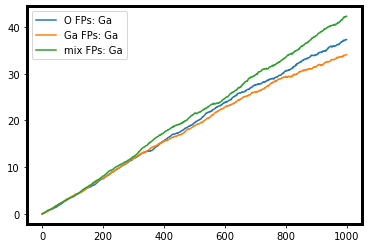

In [32]:
#FPA MSD
#O FPs
path='/home/heruhe/Desktop/Ga2o3/Frankpair/FP_beta/npt/O/out'
os.chdir(path)
ga_oMSD=np.zeros((1000,2))
for i in range(1,1001):
    df=pd.read_csv('particle_Displacement_Magnitude{}.csv'.format(i))
    ga_oMSD[i-1,:]=calculate_msd(df,0)
plt.plot(ga_oMSD[:,0],label='O FPs: Ga')
#plt.plot(ga_oMSD[:,1],label='O FPs: O')
#FPA MSD
#Ga FPs
path='/home/heruhe/Desktop/Ga2o3/Frankpair/FP_beta/npt/Ga/out'
os.chdir(path)
ga_oMSD=np.zeros((1000,2))
for i in range(1,1001):
    df=pd.read_csv('particle_Displacement_Magnitude{}.csv'.format(i))
    ga_oMSD[i-1,:]=calculate_msd(df,0)
plt.plot(ga_oMSD[:,0],label='Ga FPs: Ga')
#plt.plot(ga_oMSD[:,1],label='Ga FPs: O')
#FPA MSD
#mix FPs
path='/home/heruhe/Desktop/Ga2o3/Frankpair/FP_beta/npt/mix/out'
os.chdir(path)
ga_oMSD=np.zeros((1000,2))
for i in range(1,1001):
    df=pd.read_csv('particle_Displacement_Magnitude{}.csv'.format(i))
    ga_oMSD[i-1,:]=calculate_msd(df,0)
plt.plot(ga_oMSD[:,0],label='mix FPs: Ga')
#plt.plot(ga_oMSD[:,1],label='mix FPs: O')
plt.legend()

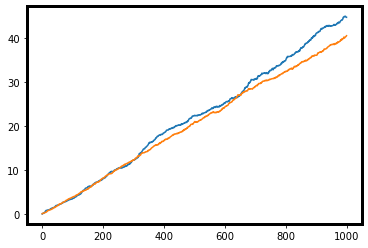

In [21]:
#FPA MSD
#mix FPs
path='/home/heruhe/Desktop/Ga2o3/Frankpair/FP_beta/npt/mix/out'
os.chdir(path)
ga_oMSD=np.zeros((1000,2))
for i in range(1,1001):
    df=pd.read_csv('particle_Displacement_Magnitude{}.csv'.format(i))
    ga_oMSD[i-1,:]=calculate_msd(df,0)
plt.plot(ga_oMSD[:,0])
plt.plot(ga_oMSD[:,1])